# Using SDKs
## Exploratory Data Analysis

In [1]:
import logging

# Configure the root logger
logging.basicConfig(
    level=logging.ERROR,  # 👈 this enables DEBUG level output
    format="%(asctime)s [%(levelname)s] %(name)s - %(message)s"
)


Import SDK and supporting libraries

In [2]:
from swcpy.swc_client import SWCClient
from swcpy.swc_config import SWCConfig
import pandas as pd
import io
import polars as pl


In [3]:
config = SWCConfig(bulk_file_format="parquet")
client = SWCClient(config)    

SWC_API_BASE_URL in SWCConfig init: https://api.sportsworldcentral.com/


## Bulk Download of Player Data - Parquet Format

In [9]:
player_bulk_data = io.BytesIO(client.get_bulk_player_file())
df = pl.read_parquet(player_bulk_data)

print(df.shape)
print(df.head())
print(df.describe())


(1018, 6)
shape: (5, 6)
┌───────────┬────────────┬────────────┬───────────┬──────────┬───────────────────┐
│ player_id ┆ gsis_id    ┆ first_name ┆ last_name ┆ position ┆ last_changed_date │
│ ---       ┆ ---        ┆ ---        ┆ ---       ┆ ---      ┆ ---               │
│ i64       ┆ str        ┆ str        ┆ str       ┆ str      ┆ str               │
╞═══════════╪════════════╪════════════╪═══════════╪══════════╪═══════════════════╡
│ 1001      ┆ 00-0023459 ┆ Aaron      ┆ Rodgers   ┆ QB       ┆ 2024-04-18        │
│ 1002      ┆ 00-0023853 ┆ Matt       ┆ Prater    ┆ K        ┆ 2024-04-18        │
│ 1003      ┆ 00-0024243 ┆ Marcedes   ┆ Lewis     ┆ TE       ┆ 2024-04-18        │
│ 1004      ┆ 00-0025565 ┆ Nick       ┆ Folk      ┆ K        ┆ 2024-04-18        │
│ 1005      ┆ 00-0025580 ┆ Mason      ┆ Crosby    ┆ K        ┆ 2024-04-18        │
└───────────┴────────────┴────────────┴───────────┴──────────┴───────────────────┘
shape: (9, 7)
┌────────────┬────────────┬────────────┬─────────

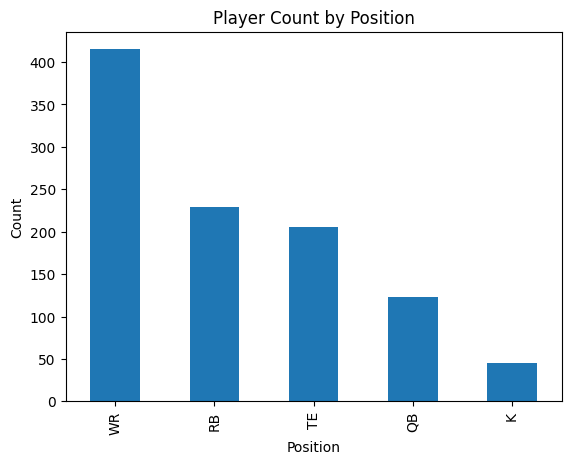

In [6]:
import matplotlib.pyplot as plt

# assuming your dataframe is named df
df["position"].to_pandas().value_counts().plot(kind="bar")

plt.title("Player Count by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()
